In [2]:
import pandas as pd
import numpy as np
import time

In [3]:
import matplotlib.pyplot as plt
import os

In [4]:
os.getcwd()

'C:\\Users\\agarw\\Dropbox\\Kaggle data-science-bowl 2019\\Prarit-data-science-bowl-2019'

In [5]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Initial EDA.ipynb',
 'sample_submission.csv',
 'specs.csv',
 'test.csv',
 'train.csv',
 'train_labels.csv']

# EDA

## train.csv

In [6]:
TrainData=pd.read_csv('train.csv')

In [7]:
TrainData.shape

(11341042, 11)

In [8]:
TrainData.keys()

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [9]:
TrainData.dtypes

event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count         int64
event_code          int64
game_time           int64
title              object
type               object
world              object
dtype: object

In [10]:
TrainData.head(5)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [11]:
TrainData.describe(include='all')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
count,11341042,11341042,11341042,11341042,11341042,1.134104e+07,1.134104e+07,1.134104e+07,11341042,11341042,11341042
unique,384,303319,10777308,10893749,17000,NaN,NaN,NaN,44,4,4
top,1325467d,6e6e697f2e593de1,2019-08-01T20:08:13.052Z,"{""event_code"": 2000, ""event_count"": 1}",f1c21eda,NaN,NaN,NaN,Chow Time,Game,MAGMAPEAK
freq,274673,3368,11,183676,58988,NaN,NaN,NaN,1150974,5795293,5023687
mean,NaN,NaN,NaN,NaN,NaN,1.056642e+02,3.513838e+03,1.976236e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.483477e+02,6.816470e+02,1.803968e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.000000e+03,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.500000e+01,3.021000e+03,3.061800e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.100000e+01,4.020000e+03,7.276100e+04,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.290000e+02,4.035000e+03,1.574460e+05,NaN,NaN,NaN


* Q: what does event_count represent?

   let us look at how many unique values are there in this column

In [12]:
TrainData['event_count'].unique()

array([   1,    2,    3, ..., 3366, 3367, 3368], dtype=int64)

In [13]:
len(TrainData['event_count'].unique())

3368

In [14]:
min(TrainData['event_count'].unique())

1

In [15]:
max(TrainData['event_count'].unique())

3368

There are 3368 unique values for event_count. These seem to be all the integers from 1 to 3368.

Let us look at the distribution various unique value under the column event_count

In [16]:
# frequency of each unique value under event_count (sorted)
TrainData.event_count.value_counts().sort_index()

1       303319
2       117340
3       116006
4       113633
5       112482
6       111158
7       110286
8       109545
9       108960
10      108383
11      107537
12      107070
13      106593
14      105748
15      105148
16      104147
17      103612
18      103014
19      102427
20      101902
21      100924
22      100315
23       99720
24       99111
25       98505
26       97464
27       96575
28       95685
29       94756
30       93785
         ...  
3339         1
3340         1
3341         1
3342         1
3343         1
3344         1
3345         1
3346         1
3347         1
3348         1
3349         1
3350         1
3351         1
3352         1
3353         1
3354         1
3355         1
3356         1
3357         1
3358         1
3359         1
3360         1
3361         1
3362         1
3363         1
3364         1
3365         1
3366         1
3367         1
3368         1
Name: event_count, Length: 3368, dtype: int64

In [17]:
# the event_count values which only occur once
event_count_freq=TrainData.event_count.value_counts().sort_index()
event_count_freq.loc[event_count_freq==1]

3183    1
3184    1
3185    1
3186    1
3187    1
3188    1
3189    1
3190    1
3191    1
3192    1
3193    1
3194    1
3195    1
3196    1
3197    1
3198    1
3199    1
3200    1
3201    1
3202    1
3203    1
3204    1
3205    1
3206    1
3207    1
3208    1
3209    1
3210    1
3211    1
3212    1
       ..
3339    1
3340    1
3341    1
3342    1
3343    1
3344    1
3345    1
3346    1
3347    1
3348    1
3349    1
3350    1
3351    1
3352    1
3353    1
3354    1
3355    1
3356    1
3357    1
3358    1
3359    1
3360    1
3361    1
3362    1
3363    1
3364    1
3365    1
3366    1
3367    1
3368    1
Name: event_count, Length: 186, dtype: int64

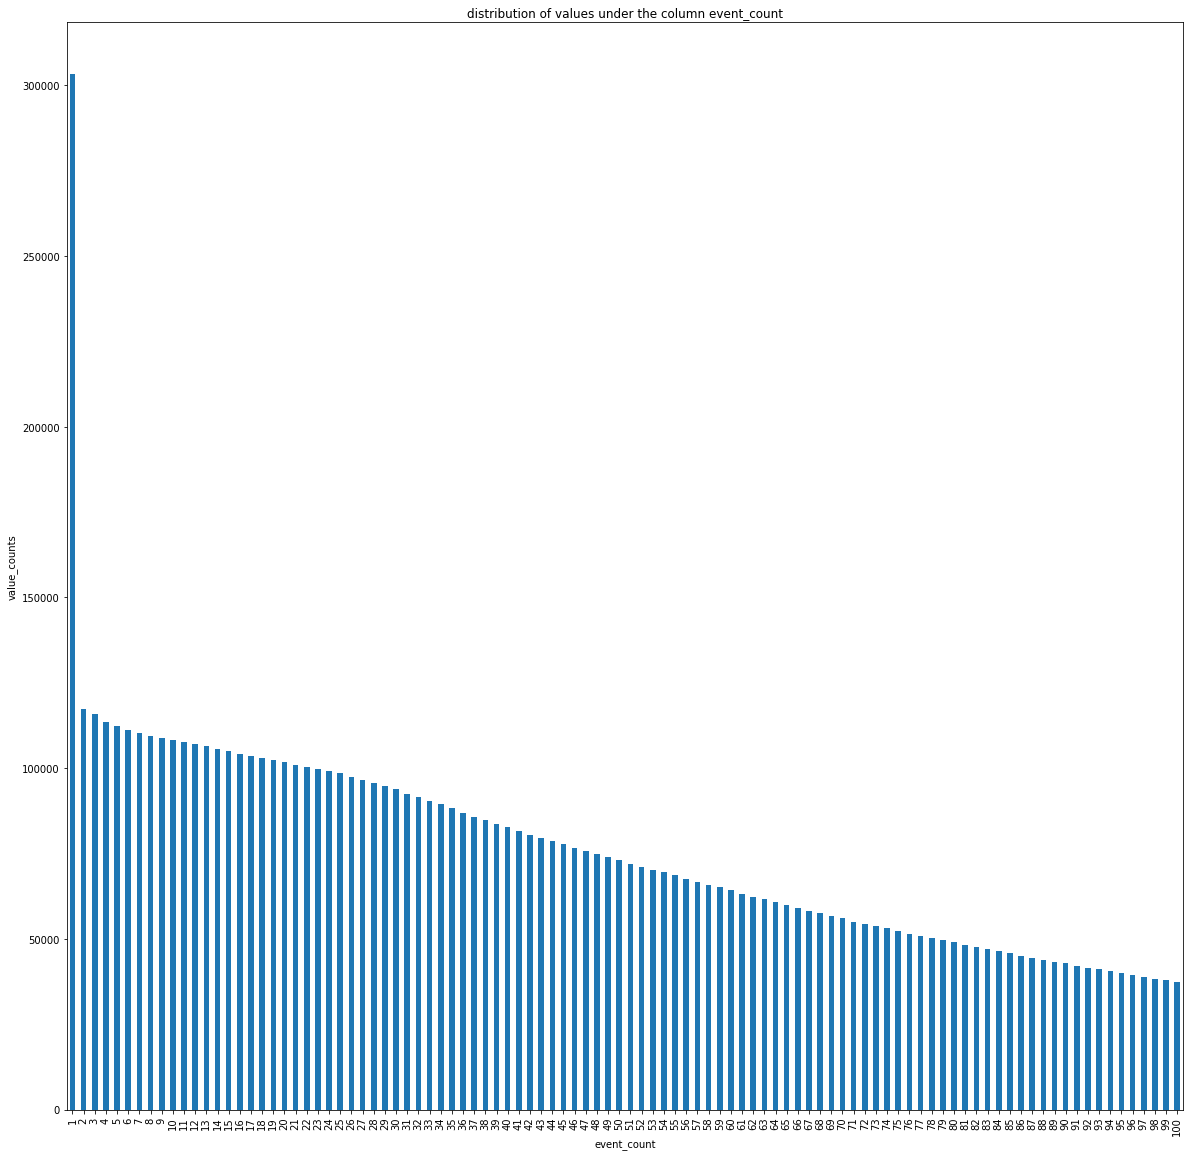

In [18]:
# bar-chart of frequencies of the first the first 100 unique values under event_count
# given that there are 3368 unique values, it is impossible to draw a single bar-chart with 
# all the unique values
plt.figure(figsize=(20,20))
TrainData['event_count'].value_counts()[0:100].plot(kind='bar')
plt.xlabel('event_count')
plt.ylabel('value_counts')
plt.title('distribution of values under the column event_count')
plt.show()

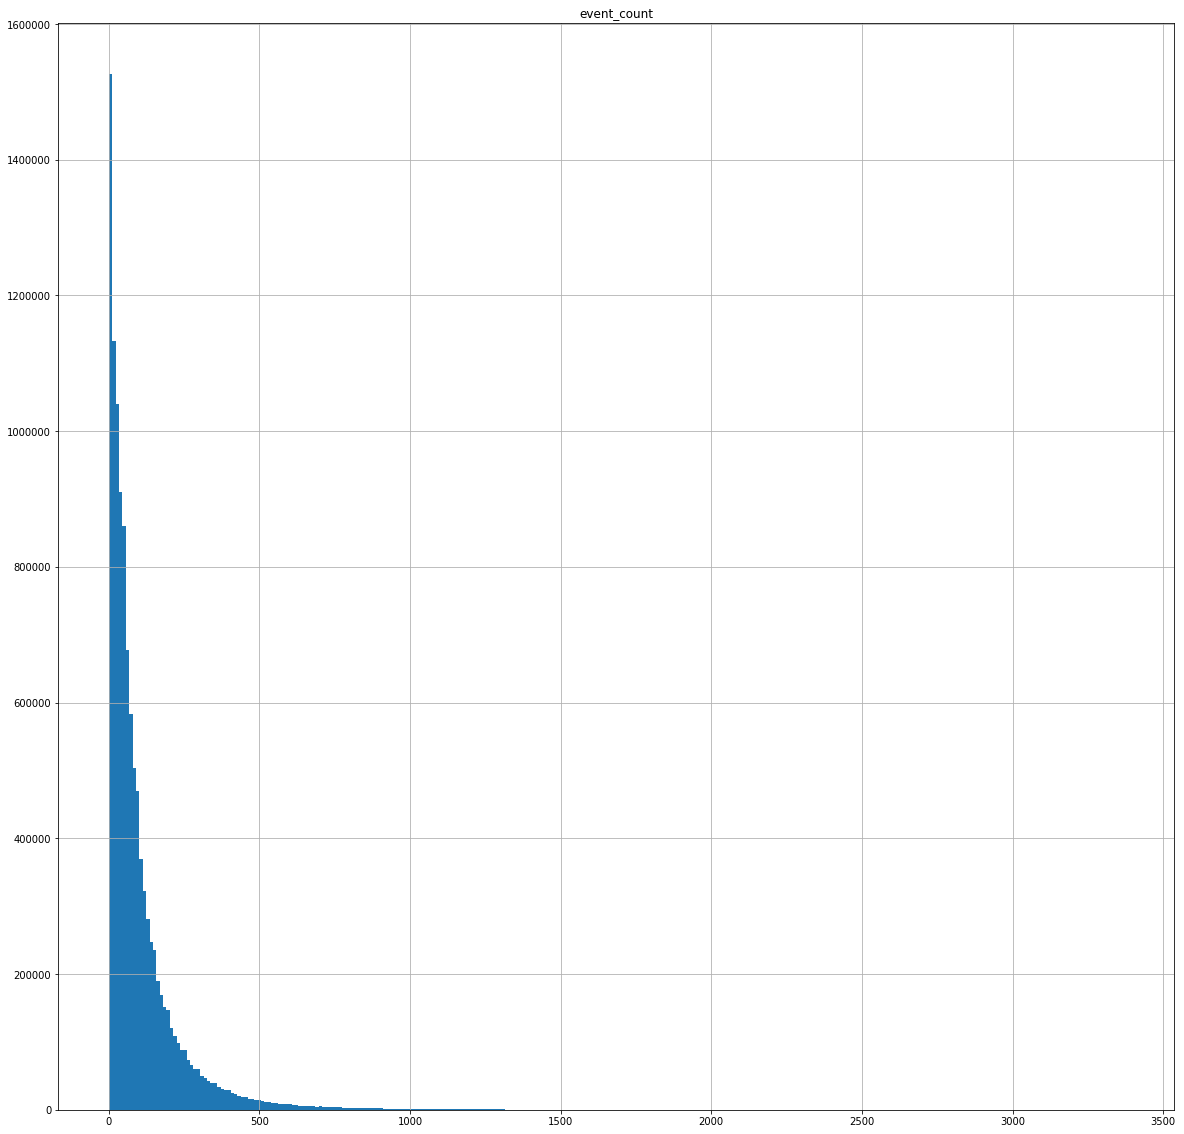

In [19]:
# all the 3368 unique values under event_count can't be put in the same bar-chart,
# therefore, it is best to use collect them into bins and look at these bins.
# We therefore draw a histogram with 300 bins for 'event_count' 
event_count_hist=TrainData.hist(column='event_count', figsize=(20,20), bins=300)

The frequency of occurence for various unique values under event_count seems to rapidly decay with most frequently occuring values lying largely between 1 and 500.  '1' occurs extremely frequently while larger values such as '3183' onwards seem to only occur once. 

* what does the column 'type' represent?

 To begin with, we note that 'type' takes 4 unique values: 'Clip', 'Activity', 'Game', 'Assessment'

In [20]:
TrainData.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

This suggest it is a categorical label. The meaning of various types has been explained in [this](https://www.kaggle.com/c/data-science-bowl-2019/discussion/115034#latest-664872) kaggle post.

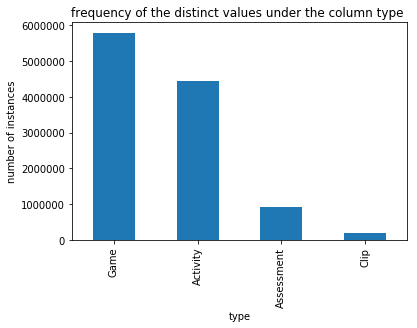

In [21]:
# frequency of the distinct 'type' values
plt.figure()
TrainData.type.value_counts().plot(kind='bar')
plt.xlabel('type')
plt.ylabel('number of instances')
plt.title('frequency of the distinct values under the column type ')
plt.show()

Note that though the data has far less number of entries with 'type'='Clip', as suggested in the aforementioned Kaggle post, this is an artifact of how the data was collected and does NOT imply that clips are less popular!

 Let us look at the entries which have 'type' = 'Clip'

In [22]:
TrainDataTpClip=TrainData.loc[TrainData['type']=='Clip']

As suggested in the above mentioned Kaggle post, 'Clips' are introductory videos to the different possible environments in the PBS KIDS Measure Up! app. Different videos can be further identified by their title. So let's check out the various possible titles for these videos. This information seems to be provided under the column 'title'.  

In [23]:
TrainDataTpClip.title.unique()

array(['Welcome to Lost Lagoon!', 'Magma Peak - Level 1',
       'Magma Peak - Level 2', 'Tree Top City - Level 1',
       'Ordering Spheres', 'Slop Problem', 'Costume Box', '12 Monkeys',
       'Tree Top City - Level 2', "Pirate's Tale", 'Treasure Map',
       'Tree Top City - Level 3', 'Rulers', 'Crystal Caves - Level 1',
       'Balancing Act', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Lifting Heavy Things', 'Honey Cake',
       'Heavy, Heavier, Heaviest'], dtype=object)

In [24]:
# number of distinct titles for 'Clip'
len(TrainDataTpClip.title.unique())

20

We therefore see that there are 20 different 'clips'

In [25]:
# confirm if there are any missing titles for 'Clip' 
TrainDataTpClip.title.isnull().values.any()

False

Let us now look at the entries that have 'type'='Activity' 

In [26]:
TrainDataTpAct=TrainData.loc[TrainData['type']=='Activity']

Once again, let us look at the various different 'titles' that 'Activity' can have. 

In [27]:
TrainDataTpAct.title.unique()

array(['Sandcastle Builder (Activity)', 'Watering Hole (Activity)',
       'Fireworks (Activity)', 'Flower Waterer (Activity)',
       'Bug Measurer (Activity)', 'Bottle Filler (Activity)',
       'Chicken Balancer (Activity)', 'Egg Dropper (Activity)'],
      dtype=object)

In [28]:
# number of different Activity-titles 
len(TrainDataTpAct.title.unique())

8

In [29]:
# are there missing entries under Activity-titles?
TrainDataTpAct.title.isnull().values.any()

False

Thus we see that there are 8 different activities possible. As explained in the kaggle [post](https://www.kaggle.com/c/data-science-bowl-2019/discussion/115034#latest-664872), activity has no predefined goal and is meant to allow the kids to get acquianted with the environment.   

let us now checkout the entries with 'type'='Game'

In [30]:
TrainDataTpGame=TrainData.loc[TrainData.type=='Game']

In [31]:
# different titles for 'type'='Game'
TrainDataTpGame.title.unique()

array(['Scrub-A-Dub', 'Dino Drink', 'All Star Sorting', 'Air Show',
       'Crystals Rule', 'Bubble Bath', 'Dino Dive', 'Chow Time',
       'Pan Balance', 'Happy Camel', 'Leaf Leader'], dtype=object)

In [32]:
# number of different titles for 'type' = 'Game'
len(TrainDataTpGame.title.unique())

11

In [33]:
# entries with 'type'=Assesment
TrainDataTpAssess=TrainData.loc[TrainData.type=='Assessment']

In [34]:
# unique titles for 'Assessment'
TrainDataTpAssess.title.unique()

array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Cart Balancer (Assessment)',
       'Chest Sorter (Assessment)'], dtype=object)

In [35]:
# no. of unique titles for 'Assessment'
len(TrainDataTpAssess.title.unique())

5

We see that there are 5 different assessments!

* what does the column 'world' represent?

The information under the 'world' column seems to be categorical. Let's look at the different possible values that can be assigned to it. 

In [36]:
TrainData.world.unique()

array(['NONE', 'MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES'], dtype=object)

By looking at [this](https://measureup.pbskids.org/) web-version of the app, we see that there are three different environments that the app provides. These are: 'MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES'. This matches exactly with the values that can be assigned to 'world'. 

However, 'world' also has 'None' as one of it's values. This happens if and only if the title is 'Welcome to Lost Lagoon!'.

In [37]:
TrainData.loc[TrainData.world=='NONE'].title.unique()

array(['Welcome to Lost Lagoon!'], dtype=object)

In [38]:
TrainData.loc[TrainData.title=='Welcome to Lost Lagoon!'].world.unique()

array(['NONE'], dtype=object)

Since 'Welcome to Lost Lagoon!' is the introductory video in the app, it does not correspond to any of the environment. This explains why it corresponding entry under the 'world' column is 'NONE'.

In [39]:
# total number of assessment sessions in train.csv
num_assess_tr=len(TrainData.loc[TrainData.type=='Assessment'].game_session.unique())
print('train.csv contains {} assessment sessions'.format(num_assess_tr))

train.csv contains 21239 assessment sessions


In [40]:
# total number of assessments that were completed 
# i.e. assessment where a solution was submitted resulting in an event with code 4100 or 4110
completed_assessments=len(TrainData.loc[(TrainData.type=='Assessment') 
                                        & ((TrainData.event_code==4100) | (TrainData.event_code==4110) )
                                       ].game_session.unique())
print('train.csv contains {} completed assessments'.format(completed_assessments))

train.csv contains 17692 completed assessments


## train_labels.csv

In [41]:
TrainLabels=pd.read_csv('train_labels.csv')

In [42]:
TrainLabels.keys()

Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [43]:
TrainLabels.dtypes

game_session        object
installation_id     object
title               object
num_correct          int64
num_incorrect        int64
accuracy           float64
accuracy_group       int64
dtype: object

In [44]:
TrainLabels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [45]:
TrainLabels.describe(include='all')

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
count,17690,17690,17690,17690.000000,17690.000000,17690.000000,17690.000000
unique,17690,3614,5,NaN,NaN,NaN,NaN
top,6fce3dcd0802b2cc,08987c08,Cart Balancer (Assessment),NaN,NaN,NaN,NaN
freq,1,156,4151,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.760938,1.587790,0.595810,1.885585
std,NaN,NaN,NaN,0.426523,3.058295,0.430559,1.256796
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,0.000000,0.111111,1.000000
50%,NaN,NaN,NaN,1.000000,0.500000,0.750000,2.500000
75%,NaN,NaN,NaN,1.000000,2.000000,1.000000,3.000000


let us look at the different unique values for the column 'title' in this dataset.

In [46]:
TrainLabels.title.unique()

array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Cart Balancer (Assessment)'], dtype=object)

From looking at the different unique values under the column 'title' in this dataset, we find that it always an assessment. Thus we conclude that this dataset contains assesment results. Having established this, it is straightforward to realize that the columns 'num_correct' and 'num_incorrect' represent the number of correct and incorrect answers leading to the assesment solution. 

We conjecture that the column 'accuracy' simply represents the ratio of correct answers to the total number of attempts. In order to check that this is indeed the case, let's contruct another column with exactly this information and it's entries match with those under 'accuracy'

In [47]:
TrainLabels['ratio_of_correct']=TrainLabels['num_correct']/(
    TrainLabels['num_correct']+TrainLabels['num_incorrect'])

To avoid false mismatch due to difference in precision, we will assume that ratio_of_correct is same as accuracy if the difference between them is less than 10**(-16)

In [48]:
(TrainLabels['ratio_of_correct']-TrainLabels['accuracy']<(10**(-16))).values.all()

True

We thus see that 'accuracy' is indeed given by the ratio of correct answers to the total number of attempts.

In [49]:
# Delete ratio_of_correct as it is same as accuracy
TrainLabels.drop(['ratio_of_correct'], axis=1, inplace=True)

In [50]:
TrainLabels.keys()

Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

As the name suggest 'accuracy_group' is the accuracy_group assigned as a result of the assessment. This is our Target Variable.

In [51]:
# checking if num_correct was ever greater than 1
(TrainLabels.num_correct>1).values.any()

False

In [52]:
TrainLabels.num_correct.unique()

array([1, 0], dtype=int64)

As expected, num_correct is only takes the values 1 or 0

In [53]:
len(TrainData.installation_id.unique())

17000

In [54]:
len(TrainLabels.installation_id.unique())

3614

Note that it is mentioned on the Data description page of the competition that the "training set contains many installation_ids which never took assessments". Thus it is no suprize that train.csv contains data about 17000 unique installation_ids but train_labels.csv only contains the assesment of a mere 3614 installation_ids. 

Also, note that that it appears that the same installation_id could have taken the same assessment multiple times i.e. same assessment with multiple game sessions. For e.g. let's look at installation_id=0006a69f and assessment titled 'Mushroom Sorter (Assessment)'

In [55]:
TrainLabels.loc[(TrainLabels.installation_id=='0006a69f') 
                & (TrainLabels.title=='Mushroom Sorter (Assessment)')]

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2


We see that there are 3 game sessions associated to the installation_id '0006a69f' where they took the same assessment.  This actually gives us and idea: We can check how the scores of a particular installation_id improve as they take the same assessment again and again. For this we will need the time_stamp of each game session. 

## specs.csv

In [56]:
Specs=pd.read_csv('specs.csv')

In [57]:
Specs.keys()

Index(['event_id', 'info', 'args'], dtype='object')

In [58]:
Specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [59]:
Specs.describe()

,event_id,info,args
count,386,386,386
unique,386,168,191
top,2a444e03,This event occurs when the player clicks on th...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
freq,1,17,25


In [60]:
Specs.iloc[0].args

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

In [61]:
Specs.iloc[0].info

'The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, "how much time elapsed while the game was presenting feedback?"'

It seems like, Specs contains the description of various event_id's.

# Further EDA

To understand the meaning of various columns further let's merge TrainData, Specs and TrainLabels. 

Since Specs seems to contain the description of different event_ids, we will merge this with TrainData on event_id. 

Similarly, since TrainLabels contains the assessment information for each installation_id, we will merge this with TrainData on installation_id and the title of the corresponding assessment. Since, as we saw earlier in the EDA for train_labels.csv, the same installation_id at times takes the same assessment in multiple game sessions, we will also use 'game_session' for merging TrainData and TrainLabels. 

### Merging TrainData with Specs and TrainLabels

In [62]:
TrainData.shape

(11341042, 11)

In [63]:
TrainData=TrainData.merge(Specs, how='left', on='event_id')

In [64]:
TrainData.shape

(11341042, 13)

In [65]:
TrainData=TrainData.merge(TrainLabels, how='left', 
                          on=['installation_id', 'title', 'game_session'])

In [66]:
TrainData.shape

(11341042, 17)

In [67]:
TrainData.keys()

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world', 'info', 'args', 'num_correct', 'num_incorrect',
       'accuracy', 'accuracy_group'],
      dtype='object')

__In the following I will try to understand what does event_code represent__

Let us look at all possible unique values of event_code

In [68]:
TrainData.event_code.unique()

array([2000, 3010, 3110, 4070, 4090, 4030, 4035, 4021, 4020, 4010, 2080,
       2083, 2040, 2020, 2030, 3021, 3121, 2050, 3020, 3120, 2060, 2070,
       4031, 4025, 5000, 5010, 2081, 2025, 4022, 2035, 4040, 4100, 2010,
       4110, 4045, 4095, 4220, 2075, 4230, 4235, 4080, 4050], dtype=int64)

In [69]:
len(TrainData.event_code.unique())

42

We see that there are merely 42 unique event_codes.

It is mentioned in the Data [section](https://www.kaggle.com/c/data-science-bowl-2019/data) of the competition that event_code 2000 always represents the start of a new game session. Let's understand this a little further.

In [70]:
TrDatEvtCd2000=TrainData.loc[TrainData.event_code==2000]

To begin with, let's check that every game_session indeed has one and only one event code with event_code =2000 (since there will be exactly one event marking the start of the game). 

If indeed this is true, then the number of entries with event_code 2000 should be equal to the number of unique game_sessions in the whole data

In [71]:
TrDatEvtCd2000.shape

(303319, 17)

In [72]:
len(TrainData.game_session.unique())

303319

In [73]:
# checking that the number of entries with event_code 2000 is same as the number of unique game sessions
len(TrainData.game_session.unique())-TrDatEvtCd2000.shape[0]

0

If event 2000 indeed represents the start of each game_session, then the list of unique sessions in TrDatEvtCd2000 should match with the list of unique sessions in TrainData

In [74]:
# checking that the list of unique sessions in TrDatEvtCd2000 matches exactly with that of unique sessions in TrainData
(TrDatEvtCd2000.game_session.unique()==TrainData.game_session.unique()).all()

True

In [75]:
TrDatEvtCd2000.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,info,args,num_correct,num_incorrect,accuracy,accuracy_group
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,This event is triggered when a video starts pl...,"[{""name"":""event_count"",""type"":""int"",""info"":""se...",NaN,NaN,NaN,NaN
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,This event is triggered when a video starts pl...,"[{""name"":""event_count"",""type"":""int"",""info"":""se...",NaN,NaN,NaN,NaN
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,The start game event is triggered at the very ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
269,77261ab5,a1ec58f109218255,2019-09-06T17:58:28.042Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,The start game event is triggered at the very ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
362,6d90d394,f11eb823348bfa23,2019-09-06T18:00:51.915Z,"{""version"":""1.0"",""level"":0,""round"":0,""event_co...",0001e90f,1,2000,0,Scrub-A-Dub,Game,MAGMAPEAK,The start game event is triggered at the very ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN


By looking at the entries under the columns 'type' and 'title' we notice that each individual Clip, Activity, Game or Assessment counts as an individual game_session. 

Now, let's look at at one particular person's (i.e. installation_id) one game session and try to understand what happened during that session. 

For no particular reason, let's choose the installation_id to be '0006a69f' and the game_session to be '901acc108f55a5a1'. 

In [76]:
TrDtIdSess=TrainData.loc[(TrainData.installation_id=='0006a69f')
              & (TrainData.game_session=='901acc108f55a5a1')]

In [77]:
# Obtaining the title of the game_session above
# Recall, that we had previously established that each game_session is associated 
# with an individual clip, activity, game or assessment. Thus it should have a unique title which
# can be obtained from the title of the very first entry
TrDtIdSess.title.iloc[0]

'Mushroom Sorter (Assessment)'

In [78]:
# just to make sure that indeed there is one and only one title associated 
# with the game_session above, let's check how many unique values are there under
# the column title. If we are correct, 
# then there should be only one i.e. 'Mushroom Sorter (Assessment)'
TrDtIdSess.title.unique()

array(['Mushroom Sorter (Assessment)'], dtype=object)

At this point we found it most useful to actually take the 'Mushroom Sorter (Assessment)' through [this](https://measureup.pbskids.org/) web-browser version of the app. We then compared what was happening in the assessment to the various events, that were recorded in the above game_session

- Following is a brief summary of what happens in the 'Mushroom Sorter (Assessment)': 

We are instructed to "pull 3 mushrooms out of the ground and arrange them in increasing order of their height". -> Then we are told that "to pick a mushroom, pull it out of the ground with your finger" -> We pick out the first mushroom, at which point the computer exclaims "That's one!" -> We pick the second mushroom, and the computer exclaims "two!" -> For the third mushroom the computer exclaims "and three!" -> We are told "now order these mushrooms by height" -> We put the mushrooms in order and place them on the respective stumps. -> computer "Ok! When you want to check your answers,  tap here" and highlights the relevant button -> upon tapping on that button, we are given an aprropriate feedback: if wrong order then "hmm, that doesn't seem to be the right order", if the order is correct then "that's right! this one is the littlest mushroom and this one is the tallest (highlights the smallest and the tallest mushrooms respectively)".

Now let us look at the data provided in the above game_session. In particular we find it is best to look at the event_data along with event_info for each event_code. We will also look at the event_count 

In [79]:
TrDtIdSess[['event_count', 'event_code', 'event_data', 'info']]

,event_count,event_code,event_data,info
2185,1,2000,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",The start game event is triggered at the very ...
2186,2,2025,"{""event_count"":2,""game_time"":37,""event_code"":2...",The start picking mushrooms event is triggered...
2187,3,3010,"{""description"":""Pull three mushrooms out of th...",The system-initiated instruction event occurs ...
2188,4,3110,"{""description"":""Pull three mushrooms out of th...",The end of system-initiated instruction event ...
2189,5,3010,"{""description"":""To pick a mushroom, pull it ou...",The system-initiated instruction event occurs ...
2190,6,4025,"{""height"":4,""coordinates"":{""x"":329,""y"":550,""st...",This event occurs when the player picks one of...
2191,7,3110,"{""description"":""To pick a mushroom, pull it ou...",The end of system-initiated instruction event ...
2192,8,3021,"{""description"":""That's one!"",""identifier"":""Dot...",The system-initiated feedback (Correct) event ...
2193,9,3121,"{""description"":""That's one!"",""identifier"":""Dot...",The end of system-initiated feedback (Correct)...
2194,10,4025,"{""height"":1,""coordinates"":{""x"":176,""y"":526,""st...",This event occurs when the player picks one of...


The first thing we notice is that each event seems to be assigned a different event_count and infact the event_count seems to correspond to the order in which the events occurr. This clarifies the note in the Data section of the competition where they say that event_count is the "Incremental counter of events within a game session (offset at 1)". 

Next if we consider the entries under 'info' and 'event_data' for the event_count=3, we find the following:

In [80]:
# info
TrDtIdSess.loc[TrDtIdSess.event_count==3]['info']

2187    The system-initiated instruction event occurs ...
Name: info, dtype: object

The info tells us that this was a "system-initiated instruction event"

In [81]:
# event_data 
TrDtIdSess.loc[TrDtIdSess.event_count==3]['event_data']

2187    {"description":"Pull three mushrooms out of th...
Name: event_data, dtype: object

The event_data gives us a "description" of the instruction i.e. ""Pull three mushrooms out of th..." which exactly the instruction we got at the begining of the 'Mushroom Sorter (Assessment)'

Similarly, from the info and event_data entries we see that event with event_count=4 marks the end of the the above system initiated instruction. 

By looking at the event codes of the above two cases and also for those with event_counts=5, 7 respectively, we find that event_code 3010 is associated with the start of a system-initiated instruction and event_code 3110 is associated with the end of that system-initiated instruction. (each system-initiated instruction has an event marking its begining and another even marking its end)

To further understand the entries under event_data and info, it also helps to look at the event with event_count=6.

In [82]:
# info
TrDtIdSess.loc[TrDtIdSess.event_count==6]['info']

2190    This event occurs when the player picks one of...
Name: info, dtype: object

It looks like this event is associated with the player picking up one of the mushrooms. 

In [83]:
# info
TrDtIdSess.loc[TrDtIdSess.event_count==6]['event_data']

2190    {"height":4,"coordinates":{"x":329,"y":550,"st...
Name: event_data, dtype: object

This seems to contain the height and the (x,y) coordinates of the mushroom that was picked. 

Note that it is mentioned that assesment attempts are assigned an event_code=4100 (except for Bird Measurer, which uses event_code 4110). Let us look at the corresponding event for the case at hand.  

In [84]:
# info 
TrDtIdSess.loc[TrDtIdSess.event_code==4100]['info']

2228    This event occurs when the player on the done ...
Name: info, dtype: object

In [85]:
# data 
TrDtIdSess.loc[TrDtIdSess.event_code==4100]['event_data']

2228    {"correct":true,"stumps":[1,2,4],"event_count"...
Name: event_data, dtype: object

From the event_data for event with code 4100 we see that the player was successful. This is indicated by the phrase "correct":true in the event_data

There are events with an event_count>100. This is a little curious. Let's look at some of these sessions. 

In [86]:
# game_session corresponding to events with event_count>100
EvCTLargeSess=TrainData.loc[TrainData.event_count>100]
GamesLargeEvCT=EvCTLargeSess.game_session.unique()

# number of game_sessions containing event_count>100
print("There are {} sessions where the event_count exceeds 100".format(len(GamesLargeEvCT)))


There are 36785 sessions where the event_count exceeds 100


Let's look at some of these sessions. 

In [87]:
session=GamesLargeEvCT[0]

In [88]:
TrainData.loc[TrainData.game_session==session]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,info,args,num_correct,num_incorrect,accuracy,accuracy_group
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,The start game event is triggered at the very ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,The system-initiated instruction event occurs ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
5,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,"{""coordinates"":{""x"":583,""y"":605,""stage_width"":...",0001e90f,4,4070,9991,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
6,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,"{""coordinates"":{""x"":601,""y"":570,""stage_width"":...",0001e90f,5,4070,10622,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
7,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,"{""coordinates"":{""x"":250,""y"":665,""stage_width"":...",0001e90f,6,4070,11255,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
8,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,"{""coordinates"":{""x"":279,""y"":629,""stage_width"":...",0001e90f,7,4070,11689,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
9,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,"{""coordinates"":{""x"":839,""y"":654,""stage_width"":...",0001e90f,8,4070,12272,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
10,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.966Z,"{""coordinates"":{""x"":807,""y"":619,""stage_width"":...",0001e90f,9,4070,12672,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
11,1325467d,0848ef14a8dc6892,2019-09-06T17:55:09.673Z,"{""coordinates"":{""x"":810,""y"":611,""stage_width"":...",0001e90f,10,4070,13389,Sandcastle Builder (Activity),Activity,MAGMAPEAK,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN


Turns out this was an 'activity'. It explains why it can have such a large number of events, since the player can continue activities indefinitely. 

Let us also look at the type of all the other game_session with event_count>100

In [89]:
# It seems the following code is a very slow implementation 
# I therefore abandoned this approach 
# a better implementation is given in the next cell
# There I use groupby to get the job done
# Therefore do NOT uncomment the code lines in this cell

#session_type=[]
#for session in GamesLargeEvCT:
#    typ=TrainData.loc[TrainData.game_session==session].type.iloc[0]
#    session_type.append([session, typ])

#LargeSessions=pd.DataFrame(session_type, columns=['game_session', 'type']) 


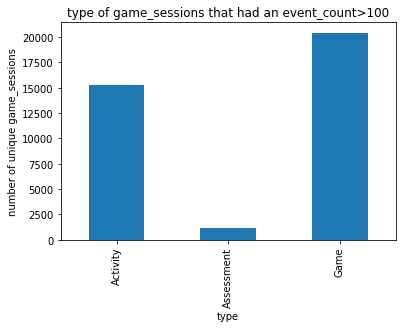

In [90]:
plt.plot()
EvCTLargeSess.groupby(['type']).game_session.unique().apply(lambda x: len(x)).plot(kind='bar')
plt.xlabel('type')
plt.ylabel('number of unique game_sessions')
plt.title('type of game_sessions that had an event_count>100')
plt.show()

Since 'Activity' and 'Games' can be played indefinitely, it is possible that for some of the corresponding game sessions the event_count is high. There are also a small number of 'Assessments' for which the event count is high. Let's look at some of these. 

In [91]:
session=EvCTLargeSess.loc[EvCTLargeSess.type=='Assessment'].game_session.iloc[0]
TrainData.loc[TrainData.game_session==session]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,info,args,num_correct,num_incorrect,accuracy,accuracy_group
7237,3bfd1a65,b2297d292892745a,2019-10-01T00:52:58.457Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006c192,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,The start game event is triggered at the very ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7238,db02c830,b2297d292892745a,2019-10-01T00:52:58.543Z,"{""event_count"":2,""game_time"":57,""event_code"":2...",0006c192,2,2025,57,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,The start picking mushrooms event is triggered...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7239,a1e4395d,b2297d292892745a,2019-10-01T00:52:58.551Z,"{""description"":""Pull three mushrooms out of th...",0006c192,3,3010,57,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,The system-initiated instruction event occurs ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7240,a52b92d5,b2297d292892745a,2019-10-01T00:53:02.384Z,"{""description"":""Pull three mushrooms out of th...",0006c192,4,3110,3938,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7241,a1e4395d,b2297d292892745a,2019-10-01T00:53:02.391Z,"{""description"":""To pick a mushroom, pull it ou...",0006c192,5,3010,3938,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,The system-initiated instruction event occurs ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7242,7da34a02,b2297d292892745a,2019-10-01T00:53:04.033Z,"{""coordinates"":{""x"":413,""y"":707,""stage_width"":...",0006c192,6,4070,5571,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7243,a52b92d5,b2297d292892745a,2019-10-01T00:53:05.095Z,"{""description"":""To pick a mushroom, pull it ou...",0006c192,7,3110,6654,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7244,7da34a02,b2297d292892745a,2019-10-01T00:53:06.431Z,"{""coordinates"":{""x"":864,""y"":485,""stage_width"":...",0006c192,8,4070,7971,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7245,7da34a02,b2297d292892745a,2019-10-01T00:53:06.849Z,"{""coordinates"":{""x"":842,""y"":488,""stage_width"":...",0006c192,9,4070,8388,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0
7246,7da34a02,b2297d292892745a,2019-10-01T00:53:07.221Z,"{""coordinates"":{""x"":807,""y"":573,""stage_width"":...",0006c192,10,4070,8771,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",0.0,4.0,0.0,0.0


In the game_session (title= 'Mushroom Sorter (Assessment)') displayed in the previous cell, we see that the player seems to take some time to understand what he/she needs to do and fumbles around a little bit leading to a larger number of events. This explains why some assessments might end up having an unusually large event_count. 

It is perhaps of some interest to note that the player first gave an incorrect answer and upon getting a system feedback tried to attempt again but then exited the session in the middle of their attempt or else this is an incomplete record of events in this game_session. 

There is a single game_session with more than 3500 events. Let us quickly look what happened here. 

In [92]:
session=TrainData.loc[TrainData.event_count>3200].game_session.unique()[0]
TrainData.loc[TrainData.game_session==session]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,info,args,num_correct,num_incorrect,accuracy,accuracy_group
4989649,9b01374f,6e6e697f2e593de1,2019-09-13T19:18:01.221Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",6f858013,1,2000,0,Flower Waterer (Activity),Activity,TREETOPCITY,The start game event is triggered at the very ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989650,56cd3b43,6e6e697f2e593de1,2019-09-13T19:18:01.609Z,"{""description"":""Welcome to the garden! Which c...",6f858013,2,3010,371,Flower Waterer (Activity),Activity,TREETOPCITY,The system-initiated instruction event occurs ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989651,a44b10dc,6e6e697f2e593de1,2019-09-13T19:18:02.006Z,"{""coordinates"":{""x"":397,""y"":647,""stage_width"":...",6f858013,3,4070,909,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player clicks on so...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989652,bbfe0445,6e6e697f2e593de1,2019-09-13T19:18:08.342Z,"{""description"":""Welcome to the garden! Which c...",6f858013,4,3110,7355,Flower Waterer (Activity),Activity,TREETOPCITY,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989653,5d042115,6e6e697f2e593de1,2019-09-13T19:18:11.611Z,"{""flowers"":[0,0,0,0,0],""flower"":0,""coordinates...",6f858013,5,4030,10590,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player picks up the...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989654,598f4598,6e6e697f2e593de1,2019-09-13T19:18:11.624Z,"{""coordinates"":{""x"":919,""y"":635,""stage_width"":...",6f858013,6,4025,10590,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player drops the wa...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989655,5d042115,6e6e697f2e593de1,2019-09-13T19:18:11.780Z,"{""flowers"":[0,0,0,0,0],""flower"":0,""coordinates...",6f858013,7,4030,10761,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player picks up the...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989656,598f4598,6e6e697f2e593de1,2019-09-13T19:18:11.829Z,"{""coordinates"":{""x"":919,""y"":599,""stage_width"":...",6f858013,8,4025,10834,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player drops the wa...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989657,5d042115,6e6e697f2e593de1,2019-09-13T19:18:12.438Z,"{""flowers"":[0,0,0,0,0],""flower"":0,""coordinates...",6f858013,9,4030,11429,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player picks up the...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN
4989658,598f4598,6e6e697f2e593de1,2019-09-13T19:18:12.523Z,"{""coordinates"":{""x"":929,""y"":624,""stage_width"":...",6f858013,10,4025,11530,Flower Waterer (Activity),Activity,TREETOPCITY,This event occurs when the player drops the wa...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill...",NaN,NaN,NaN,NaN


Turns out, this was an 'activity' and the player continued to play this for a long time. The large number of events is therefore hardly suprising. 

# EDA of test.csv

In [93]:
Test=pd.read_csv('test.csv')

In [94]:
Test.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [95]:
Test.keys()

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

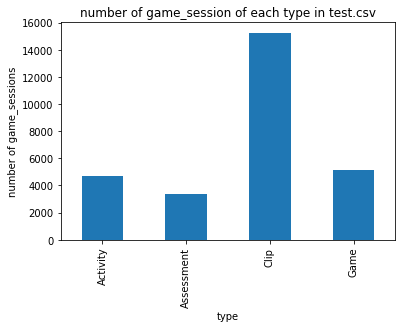

In [96]:
# let's plot the number of game_session of each type in Test

plt.figure()
Test.groupby(['type']).game_session.unique().apply(lambda x: len(x)).plot(kind='bar')
plt.xlabel('type')
plt.ylabel('number of game_sessions')
plt.title('number of game_session of each type in test.csv')
plt.show()

In [97]:
# let us look at the different kinds of events captured in the test data
# We can do this by looking at the kind of different event_codes
Test.event_code.unique()

array([2000, 4010, 3010, 3110, 2020, 4070, 4030, 4035, 4020, 3020, 3120,
       2030, 3021, 3121, 2025, 4100, 2010, 4025, 4021, 2060, 2070, 2080,
       2081, 2040, 2050, 2083, 5000, 5010, 2075, 4031, 4045, 4040, 2035,
       4220, 4022, 4090, 4110, 4095, 4230, 4235, 4050, 4080], dtype=int64)

In [98]:
len(Test.event_code.unique())

42

Note that from our inspection of specs.csv, we had concluded that their of 42 distinct events that can occurr. Indeed, the test data seems to have all of them. 

In [99]:
# eye-balling the entries having type 'Activity'
Test.loc[Test.type=="Activity"].head(25)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
246,4901243f,41591f66b833b47c,2019-09-11T13:45:49.566Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Fireworks (Activity),Activity,TREETOPCITY
247,beb0a7b9,41591f66b833b47c,2019-09-11T13:45:49.608Z,"{""description"":""Let's set off these fireworks....",00abaee7,2,3010,0,Fireworks (Activity),Activity,TREETOPCITY
248,02a42007,41591f66b833b47c,2019-09-11T13:45:53.010Z,"{""rocket"":6,""coordinates"":{""x"":611,""y"":665,""st...",00abaee7,3,4030,3597,Fireworks (Activity),Activity,TREETOPCITY
249,e694a35b,41591f66b833b47c,2019-09-11T13:45:53.463Z,"{""rocket"":6,""height"":562,""duration"":467,""coord...",00abaee7,4,4020,4064,Fireworks (Activity),Activity,TREETOPCITY
250,b88f38da,41591f66b833b47c,2019-09-11T13:45:53.559Z,"{""description"":""Let's set off these fireworks....",00abaee7,5,3110,4181,Fireworks (Activity),Activity,TREETOPCITY
251,884228c8,41591f66b833b47c,2019-09-11T13:45:54.147Z,"{""coordinates"":{""x"":606,""y"":618,""stage_width"":...",00abaee7,6,4070,4753,Fireworks (Activity),Activity,TREETOPCITY
252,beb0a7b9,41591f66b833b47c,2019-09-11T13:45:54.392Z,"{""description"":""Great job! You did it."",""ident...",00abaee7,7,3010,4998,Fireworks (Activity),Activity,TREETOPCITY
253,b88f38da,41591f66b833b47c,2019-09-11T13:45:56.076Z,"{""description"":""Great job! You did it."",""ident...",00abaee7,8,3110,6698,Fireworks (Activity),Activity,TREETOPCITY
254,02a42007,41591f66b833b47c,2019-09-11T13:45:56.684Z,"{""rocket"":6,""coordinates"":{""x"":614,""y"":642,""st...",00abaee7,9,4030,7281,Fireworks (Activity),Activity,TREETOPCITY
255,e694a35b,41591f66b833b47c,2019-09-11T13:45:57.868Z,"{""rocket"":6,""height"":1,""duration"":1200,""coordi...",00abaee7,10,4020,8481,Fireworks (Activity),Activity,TREETOPCITY


In [100]:
# eye-balling the entries having type 'Game'
Test.loc[Test.type=="Game"].head(25)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES
5,f93fc684,a022c3f60ba547e7,2019-09-10T16:54:14.338Z,"{""coordinates"":{""x"":515,""y"":697,""stage_width"":...",00abaee7,2,4010,2232,Chow Time,Game,CRYSTALCAVES
6,7ec0c298,a022c3f60ba547e7,2019-09-10T16:54:16.553Z,"{""description"":""It's Chow Time! We have some V...",00abaee7,3,3010,4445,Chow Time,Game,CRYSTALCAVES
7,0d1da71f,a022c3f60ba547e7,2019-09-10T16:54:23.364Z,"{""description"":""It's Chow Time! We have some V...",00abaee7,4,3110,11251,Chow Time,Game,CRYSTALCAVES
8,63f13dd7,a022c3f60ba547e7,2019-09-10T16:54:23.365Z,"{""dinosaur"":""stacey"",""diet"":""herbivore"",""targe...",00abaee7,5,2020,11251,Chow Time,Game,CRYSTALCAVES
9,7372e1a5,a022c3f60ba547e7,2019-09-10T16:54:25.029Z,"{""coordinates"":{""x"":901,""y"":449,""stage_width"":...",00abaee7,6,4070,12929,Chow Time,Game,CRYSTALCAVES
10,cfbd47c8,a022c3f60ba547e7,2019-09-10T16:54:26.776Z,"{""weight"":3,""source"":""resources"",""resources"":[...",00abaee7,7,4030,14663,Chow Time,Game,CRYSTALCAVES
11,d185d3ea,a022c3f60ba547e7,2019-09-10T16:54:26.891Z,"{""weight"":3,""resources"":[1,1,3],""coordinates"":...",00abaee7,8,4035,14796,Chow Time,Game,CRYSTALCAVES
12,cfbd47c8,a022c3f60ba547e7,2019-09-10T16:54:28.460Z,"{""weight"":1,""source"":""resources"",""resources"":[...",00abaee7,9,4030,16363,Chow Time,Game,CRYSTALCAVES
13,d185d3ea,a022c3f60ba547e7,2019-09-10T16:54:28.608Z,"{""weight"":1,""resources"":[3,1,3],""coordinates"":...",00abaee7,10,4035,16513,Chow Time,Game,CRYSTALCAVES


In [101]:
# eye-balling the entries having type 'Assessment'
Test.loc[Test.type=="Assessment"].head(25)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
282,7ad3efc6,8b38fc0d2fd315dc,2019-09-11T18:56:11.918Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
283,65a38bf7,8b38fc0d2fd315dc,2019-09-11T18:56:12.019Z,"{""crystals"":[{""id"":""gem07"",""weight"":6},{""id"":""...",00abaee7,2,2020,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
284,795e4a37,8b38fc0d2fd315dc,2019-09-11T18:56:12.030Z,"{""description"":""We've got to balance this scal...",00abaee7,3,3010,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
285,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:15.790Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,4,4030,3852,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
286,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:17.869Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,5,4020,5968,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
287,828e68f9,8b38fc0d2fd315dc,2019-09-11T18:56:19.084Z,"{""description"":""We've got to balance this scal...",00abaee7,6,3110,7185,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
288,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:19.155Z,"{""crystal_id"":""gem08"",""weight"":6,""coordinates""...",00abaee7,7,4030,7218,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
289,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:19.783Z,"{""crystal_id"":""gem08"",""weight"":6,""coordinates""...",00abaee7,8,4020,7885,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
290,acf5c23f,8b38fc0d2fd315dc,2019-09-11T18:56:23.168Z,"{""coordinates"":{""x"":842,""y"":654,""stage_width"":...",00abaee7,9,4070,11252,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
291,acf5c23f,8b38fc0d2fd315dc,2019-09-11T18:56:23.184Z,"{""coordinates"":{""x"":267,""y"":609,""stage_width"":...",00abaee7,10,4070,11252,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


 let's look at all the events in the session with id = 8b38fc0d2fd315dc associated with the 'Cart Balancer (Assessment)' of the player with installation_id = 00abaee7

In [102]:
Test.loc[Test.game_session == '8b38fc0d2fd315dc']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
282,7ad3efc6,8b38fc0d2fd315dc,2019-09-11T18:56:11.918Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
283,65a38bf7,8b38fc0d2fd315dc,2019-09-11T18:56:12.019Z,"{""crystals"":[{""id"":""gem07"",""weight"":6},{""id"":""...",00abaee7,2,2020,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
284,795e4a37,8b38fc0d2fd315dc,2019-09-11T18:56:12.030Z,"{""description"":""We've got to balance this scal...",00abaee7,3,3010,58,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
285,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:15.790Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,4,4030,3852,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
286,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:17.869Z,"{""crystal_id"":""gem07"",""weight"":6,""coordinates""...",00abaee7,5,4020,5968,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
287,828e68f9,8b38fc0d2fd315dc,2019-09-11T18:56:19.084Z,"{""description"":""We've got to balance this scal...",00abaee7,6,3110,7185,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
288,5e109ec3,8b38fc0d2fd315dc,2019-09-11T18:56:19.155Z,"{""crystal_id"":""gem08"",""weight"":6,""coordinates""...",00abaee7,7,4030,7218,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
289,5c2f29ca,8b38fc0d2fd315dc,2019-09-11T18:56:19.783Z,"{""crystal_id"":""gem08"",""weight"":6,""coordinates""...",00abaee7,8,4020,7885,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
290,acf5c23f,8b38fc0d2fd315dc,2019-09-11T18:56:23.168Z,"{""coordinates"":{""x"":842,""y"":654,""stage_width"":...",00abaee7,9,4070,11252,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
291,acf5c23f,8b38fc0d2fd315dc,2019-09-11T18:56:23.184Z,"{""coordinates"":{""x"":267,""y"":609,""stage_width"":...",00abaee7,10,4070,11252,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


Turns out that the test data contains the full sequence of events and also the results of this assessment (result can be obtained from event with event_count 22 )

let's look at all the assessments done by the player with installation_id = '00abaee7'

In [103]:
# In particular we wish to see the number of events in each assessment attempted by the chosen player
# One way to do this is to group their corresponding data according to their session_ids 
# The number of counts can then be obtained by using the function size()
# The reason this works is because each event has been recorded in a seperate row, so counting 
# the number of rows for each session (i.e. asking for their size) gives the number of events

# In order to obtain various statistics for each group in a pandas.GroupBy object 
# follow this stackoverflow discussion:
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby


Test.loc[(Test.installation_id =='00abaee7')
         & (Test.type=='Assessment')].groupby(['game_session']).size()

game_session
348d7f09f96af313     1
8b38fc0d2fd315dc    26
dtype: int64

Let us look at a few other players and checkout their assessments

In [104]:
player=Test.installation_id.unique()[5]
print('The chosen player has installation id: {}'.format(player))

The chosen player has installation id: 02256298


In [105]:

Test.loc[(Test.installation_id ==player)
         & (Test.type=='Assessment')].groupby(['game_session']).size()

game_session
73cf848935e13a2e     1
fec14d065240b4f6    15
dtype: int64

In [106]:
player=Test.installation_id.unique()[20]
print('The chosen player has installation id: {}'.format(player))

The chosen player has installation id: 05771bba


In [107]:

Test.loc[(Test.installation_id ==player)
         & (Test.type=='Assessment')].groupby(['game_session']).size()

game_session
64c0a7dd7306b1d9     1
825db9b3085c6855    32
8ea3932094dfb52f    27
97b4fa47399fa24e    50
a9ee75f650778f28    52
cc45db5a3b5d74e4    29
dtype: int64

In [108]:
player=Test.installation_id.unique()[35]
print('The chosen player has installation id: {}'.format(player))

The chosen player has installation id: 0a2a77b2


In [109]:

Test.loc[(Test.installation_id ==player)
         & (Test.type=='Assessment')].groupby(['game_session']).size()

game_session
46fa741f852bac0c     1
4949ac1618565f06    82
dtype: int64

As is also mentioned in the Data section of the competition, it looks like test.csv contains data about all the game_session of any particular player, except one randamly chosen assessment whose history is redacted after the start event. The aim of the competition then is predict the 'accuracy_group' for this assessment for each player in test.csv

Let us compute the number of assessments taken by each player in test.csv and plot a histogram showing how many players took how many assessments.

In [110]:
num_assessments=Test.loc[Test.type=='Assessment'].groupby(['installation_id']).game_session.unique().apply(lambda x: len(x))

In [111]:
# minimum number of assessments taken by any player
print("The minimum number of assessments taken by any player in test data is:{}".
      format(num_assessments.min()))

The minimum number of assessments taken by any player in test data is:1


In [112]:
# maximum number of assessments taken by any player
print("The maximum number of assessments taken by any player in test data is:{}".
      format(num_assessments.max()))

The maximum number of assessments taken by any player in test data is:56


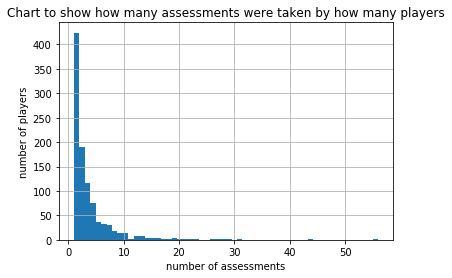

In [113]:
plt.figure()
num_assessments.hist(bins=56)
plt.xlabel('number of assessments')
plt.ylabel('number of players')
plt.title('Chart to show how many assessments were taken by how many players')
plt.show()

In [114]:
num_assessments.value_counts()

1     424
2     189
3     116
4      76
5      37
6      32
7      31
8      19
9      14
10     14
12      8
13      7
14      4
15      4
16      3
19      3
17      2
18      2
11      2
23      2
31      2
44      1
20      1
21      1
22      1
26      1
27      1
28      1
29      1
56      1
Name: game_session, dtype: int64

Looks like a large number of players only took 1 or 2 assessments. 

#  Rough

__Checking if Scores of a person improves if they take the same assessment multiple times (for the time being we only look at installation_id = '0006a69f' and their attempts at the 'Mushroom Sorter (Assessment)' , but we should look at this for all assessments and for  all the people who took atleast one assessment )__

In [115]:
p1=TrainData.loc[(TrainData.installation_id=='0006a69f') 
                & (TrainData.title=='Mushroom Sorter (Assessment)')][
    ['game_session','timestamp', 'title','accuracy','num_correct']]

In [116]:
p1.game_session.unique()

array(['901acc108f55a5a1', '6bdf9623adc94d89', 'e7e7db2a241eadcc',
       '9501794defd84e4d'], dtype=object)

In [117]:
p1.loc[p1.game_session=='901acc108f55a5a1'].timestamp.iloc[0]

'2019-08-06T05:22:01.344Z'

In [118]:
p1.loc[p1.game_session=='901acc108f55a5a1'].timestamp.iloc[-1]

'2019-08-06T05:22:41.147Z'

In [119]:
# for each game session, we want the start time, end time and accuracy
# in the following function, we pass the data for a particular installation id,
# then it returns a dataframe all their game_sessions and 
# the coressponding starttime, endtime and accuracy
def game_info(p1):
    unique_games=p1.game_session.unique()
    info_lis=[]
    for game in unique_games:
        info=p1.loc[p1.game_session==game]
        starttime=info.timestamp.iloc[0]
        endtime=info.timestamp.iloc[-1]
        accuracy=info.accuracy.iloc[0]
        info_lis.append([game, starttime, endtime, accuracy])
    
    return pd.DataFrame(info_lis, columns=['game_session', 'starttime', 'endtime', 'accuracy'])

In [120]:
game_info(p1)

,game_session,starttime,endtime,accuracy
0,901acc108f55a5a1,2019-08-06T05:22:01.344Z,2019-08-06T05:22:41.147Z,1.0
1,6bdf9623adc94d89,2019-08-06T05:37:50.020Z,2019-08-06T05:38:16.835Z,1.0
2,e7e7db2a241eadcc,2019-08-06T20:34:35.357Z,2019-08-06T20:34:44.115Z,NaN
3,9501794defd84e4d,2019-08-06T20:34:53.812Z,2019-08-06T20:35:25.648Z,0.5


In [121]:
p1

,game_session,timestamp,title,accuracy,num_correct
2185,901acc108f55a5a1,2019-08-06T05:22:01.344Z,Mushroom Sorter (Assessment),1.0,1.0
2186,901acc108f55a5a1,2019-08-06T05:22:01.400Z,Mushroom Sorter (Assessment),1.0,1.0
2187,901acc108f55a5a1,2019-08-06T05:22:01.403Z,Mushroom Sorter (Assessment),1.0,1.0
2188,901acc108f55a5a1,2019-08-06T05:22:05.242Z,Mushroom Sorter (Assessment),1.0,1.0
2189,901acc108f55a5a1,2019-08-06T05:22:05.244Z,Mushroom Sorter (Assessment),1.0,1.0
2190,901acc108f55a5a1,2019-08-06T05:22:07.812Z,Mushroom Sorter (Assessment),1.0,1.0
2191,901acc108f55a5a1,2019-08-06T05:22:07.812Z,Mushroom Sorter (Assessment),1.0,1.0
2192,901acc108f55a5a1,2019-08-06T05:22:07.816Z,Mushroom Sorter (Assessment),1.0,1.0
2193,901acc108f55a5a1,2019-08-06T05:22:08.427Z,Mushroom Sorter (Assessment),1.0,1.0
2194,901acc108f55a5a1,2019-08-06T05:22:09.742Z,Mushroom Sorter (Assessment),1.0,1.0


In [122]:
TrainData.loc[TrainData.type=='Assessment'].groupby(['installation_id']).game_session.unique().apply(lambda x: len(x))

installation_id
0006a69f     6
0006c192     4
00129856     2
001d0ed0     6
00225f67     2
00279ac5     2
002db7e3    10
003372b0     6
004c2091    13
00634433     3
00667b88     2
00691033    12
00a0dbeb     4
00a53963     1
00ad158e     2
00ae9d04     2
00b9d8e6     2
00cef781     1
00d2576a     1
00e17272     9
00e536bf     8
00fa8681     4
00fc65b6    10
010bc1d5     2
01120f12     1
01380088     1
014ef504     1
0153c957     1
0155dd86     5
015776b4     5
            ..
fdf4eb95     3
fe191c4a     2
fe1a1d3f     1
fe1bf3f6     2
fe488283     2
fe4a63a7     1
fe4d880a     4
fe5f0699     4
fe73bf4b     3
fe769df4     1
fe9f9b60     1
fea3bdfc     7
febe3399     2
fed331e8     1
ff00d909     1
ff0fbb7e     1
ff107709     1
ff24ea49     1
ff3e1e35    14
ff5e5baf     3
ff6477f5     1
ff7fb595     1
ff882868     2
ff90db99     8
ff9305d7     5
ff9715db     9
ffc90c32     6
ffd2871d     1
ffe3b25d     2
ffeb0b1b     3
Name: game_session, Length: 4242, dtype: int64

In [123]:
len(TrainData.loc[TrainData.type=='Assessment'].game_session.unique())

21239